In [1]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

/home/shivani/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shivani/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shivani/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shivani/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
Iris = pd.read_csv("iris.csv")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
Iris.shape

(150, 5)

In [4]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris = Iris[0:100]
Iris.shape

(100, 5)

In [5]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris['species'] = Iris['species'].replace('setosa','0')
Iris['species'] = Iris['species'].replace('versicolor','1')

In [6]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


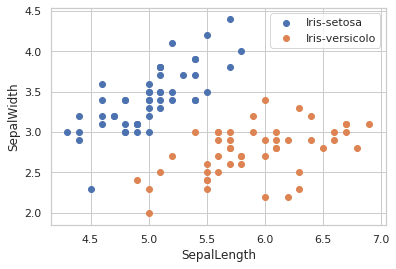

In [7]:
#visualization of given dataset
#codesegment4------------------
plt.scatter(Iris[:50].sepal_length, Iris[:50].sepal_width, label='Iris-setosa')
plt.scatter(Iris[51:].sepal_length, Iris[51:].sepal_width, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [8]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [9]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)
#line6-------------
tf.set_random_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [10]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [11]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
    columnwise_max = np.max(data, axis=0)
    columnwise_min = np.min(data, axis=0)
    return np.divide(data - columnwise_min, columnwise_max - columnwise_min)

In [12]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- 
W = tf.Variable(tf.random_normal(shape=[4, 1])) #weights
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
#line1
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#placeholder are used to store training data while variables store weights and bias-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [14]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod = tf.matmul(data, W) + b

In [15]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [16]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
#line12--------------------------------
learning_rate = 0.003
batch_size = 30
#batch_size---- #using batch makes the training ------?
#line13--------------------------------
#iter_num
iter_num = 1500

In [17]:
# Define the optimizer with name opt
#line14-----------------------------
opt = tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [18]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [19]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [20]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ 
    batch_index = np.random.choice(len(train_X), size=batch_size) #randomnly picks up up 30 sample data from the train_X
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the results of loss and train accuracy
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))
#Write the command to calculate test accuracy:
#line18-------------------------------
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.313058 train_acc: 0.862500 test_acc: 0.850000
epoch:  200 loss: 0.147186 train_acc: 1.000000 test_acc: 1.000000
epoch:  300 loss: 0.152873 train_acc: 1.000000 test_acc: 1.000000
epoch:  400 loss: 0.137271 train_acc: 1.000000 test_acc: 1.000000
epoch:  500 loss: 0.126940 train_acc: 1.000000 test_acc: 1.000000
epoch:  600 loss: 0.136173 train_acc: 1.000000 test_acc: 1.000000
epoch:  700 loss: 0.117145 train_acc: 1.000000 test_acc: 1.000000
epoch:  800 loss: 0.108187 train_acc: 1.000000 test_acc: 1.000000
epoch:  900 loss: 0.105309 train_acc: 1.000000 test_acc: 1.000000
epoch: 1000 loss: 0.117278 train_acc: 1.000000 test_acc: 1.000000
epoch: 1100 loss: 0.097870 train_acc: 1.000000 test_acc: 1.000000
epoch: 1200 loss: 0.104400 train_acc: 1.000000 test_acc: 1.000000
epoch: 1300 loss: 0.106778 train_acc: 1.000000 test_acc: 1.000000
epoch: 1400 loss: 0.092914 train_acc: 1.000000 test_acc: 1.000000
epoch: 1500 loss: 0.067081 train_acc: 1.000000 test_acc: 1.000000
The test a

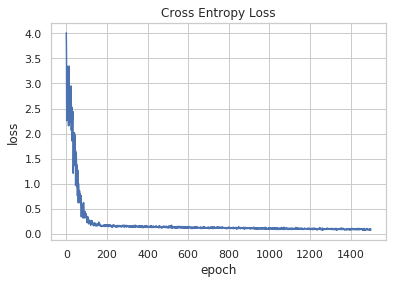

In [21]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

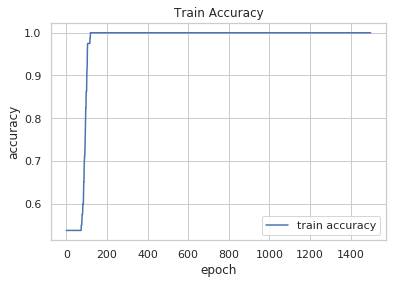

In [22]:
# plot for training accuracy
#codesegment20---------------------------
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train Accuracy')
plt.legend(loc='best')
plt.show()